In [1]:
import pandas as pd
data = pd.read_csv('anay.csv')

In [2]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,4203,5458,6524.5,4396
1,2,4210,6003,7240.6,4688
2,3,4217,6672,8007.6,4769
3,4,4221,8047,9107.6,4863
4,5,4271,9305,10369.6,4953


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 

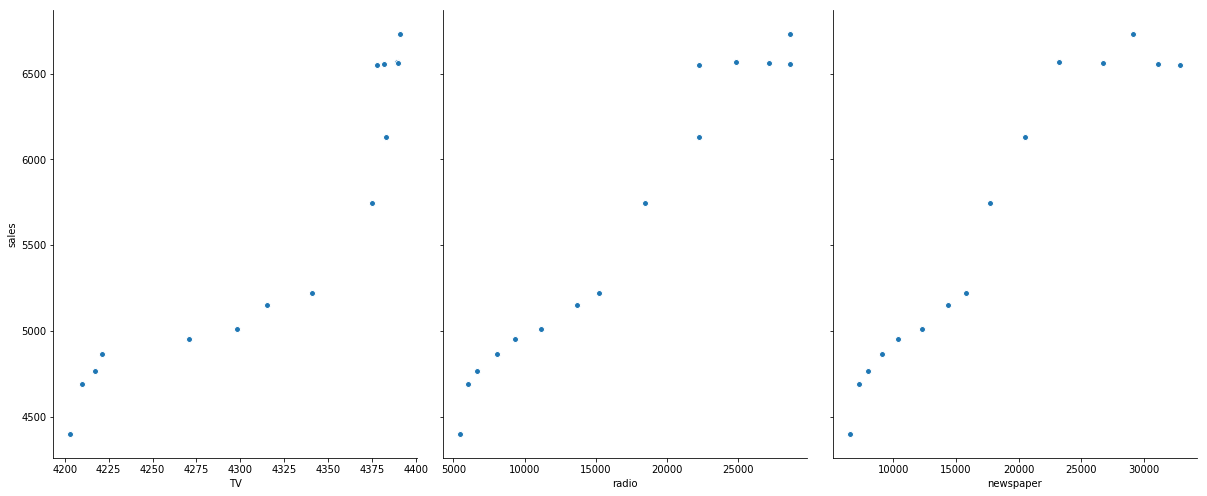

In [4]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.8)
plt.show()

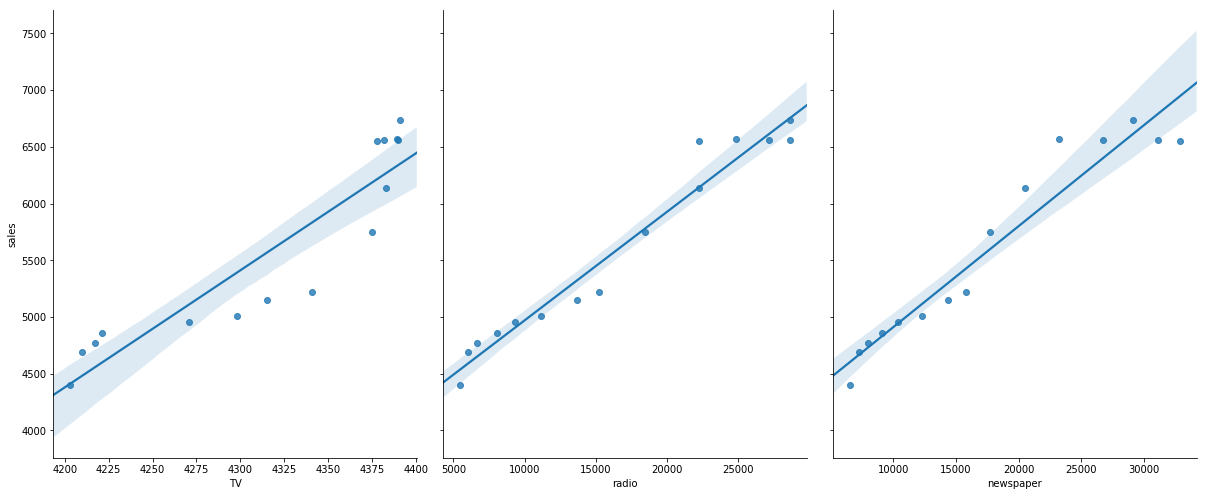

In [6]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.8, kind='reg')
plt.show()

In [7]:
feature_cols = ['TV', 'radio', 'newspaper']

In [8]:
X = data[feature_cols]
# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

In [9]:
print(X.head())

     TV  radio  newspaper
0  4203   5458     6524.5
1  4210   6003     7240.6
2  4217   6672     8007.6
3  4221   8047     9107.6
4  4271   9305    10369.6


In [10]:
y = data['sales']

In [11]:
y = data.sales
# print the first 5 values
print(y.head())

0    4396
1    4688
2    4769
3    4863
4    4953
Name: sales, dtype: int64


In [12]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(11, 3)
(11,)
(4, 3)
(4,)


In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print (model)
print (linreg.intercept_)
print (linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
-5573.314934662109
[2.28150001 0.04925398 0.02932625]


In [16]:
y_pred = linreg.predict(X_test)
print (y_pred)

[4720.33508677 5542.15081407 5366.69409338 4611.22599704]


In [18]:
print (type(y_pred),type(y_test))
print (len(y_pred),len(y_test))
print (y_pred.shape,y_test.shape)
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
4 4
(4,) (4,)
RMSE by hand: 62.47130149469427


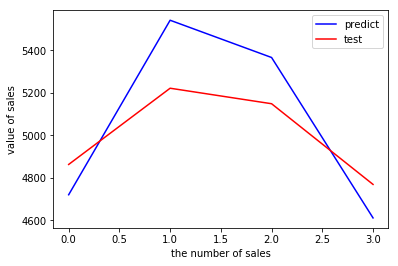

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()